In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(URL)
df = pd.read_csv(io.StringIO(response.text))
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [3]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [5]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [6]:
df.shape

(528, 15)

### Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year


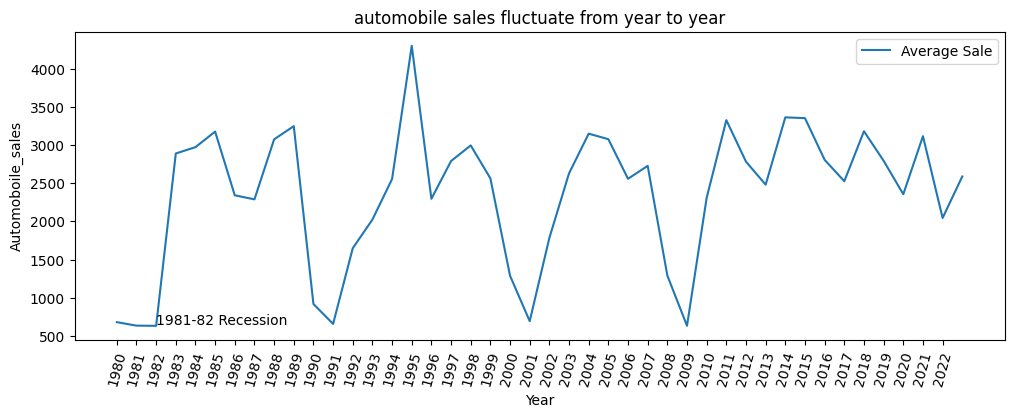

In [7]:
df_line = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(12,4))
df_line.plot(kind='line', label = 'Average Sale')
plt.xlabel('Year')
plt.ylabel('Automoboile_sales')
plt.title('automobile sales fluctuate from year to year')
plt.xticks(list(range(1980, 2023)), rotation = 75)
plt.text(1982,650,'1981-82 Recession')
plt.legend()
plt.show()

### Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


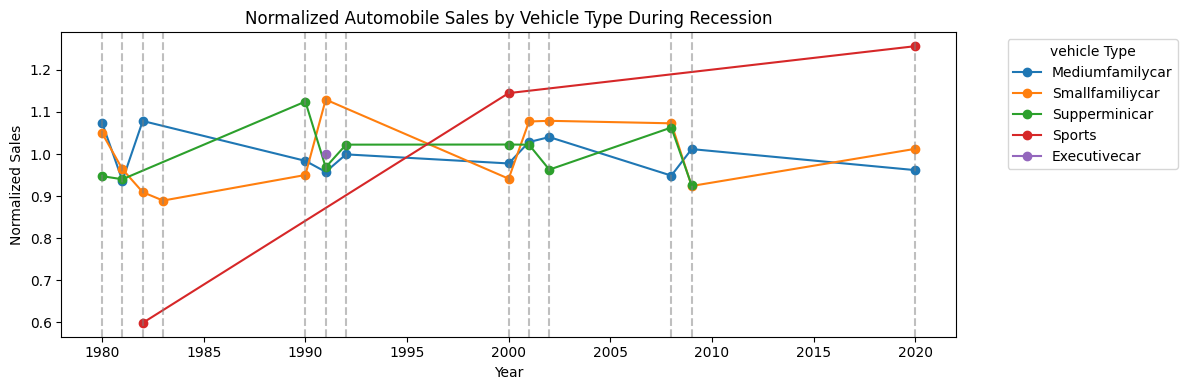

In [8]:
df_rec = df[df['Recession'] == 1]
df_mline = df_rec.groupby(['Year','Vehicle_Type'], as_index = False)['Automobile_Sales'].mean()

df_mline['Normalized_Sales'] = df_mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x /x.mean())
df_mline.set_index('Year',inplace=True)

plt.figure(figsize=(12,4))
for vehicle_type in df_mline['Vehicle_Type'].unique():
    data = df_mline[df_mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label = vehicle_type, marker = 'o')

recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

plt.legend(title ='vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")
plt.tight_layout()
plt.show()

### Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.



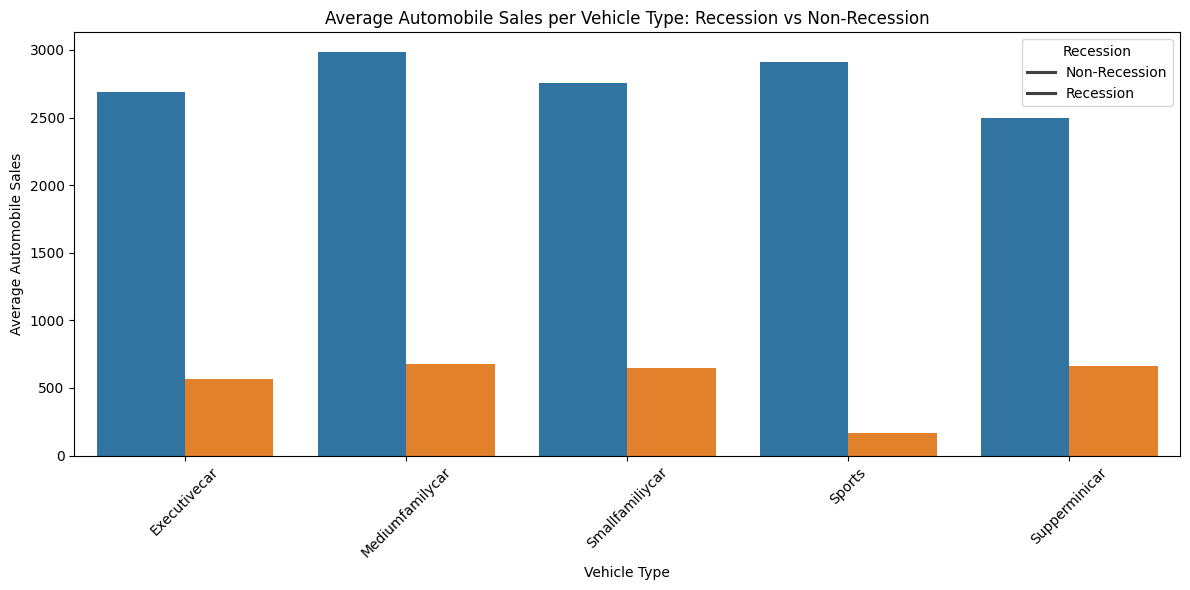

In [9]:
plt.figure(figsize=(12, 6))

grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=grouped_df)

plt.title('Average Automobile Sales per Vehicle Type: Recession vs Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.legend(title='Recession', labels=['Non-Recession', 'Recession']) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
#### How did the GDP vary over time during recession and non-recession periods? 


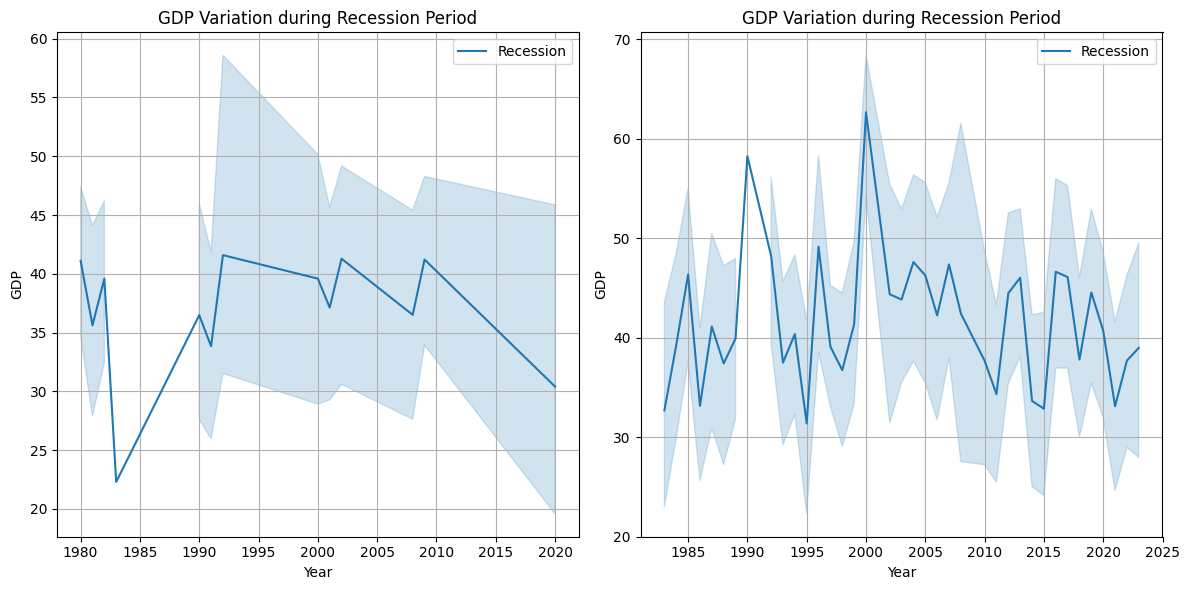

In [13]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
fig=plt.figure(figsize=(12, 6))
    
ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1 ,2 ,2 ) 
    
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
ax0.grid()

sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Recession Period')
ax1.grid()

plt.tight_layout()
plt.show()



### Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
#### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


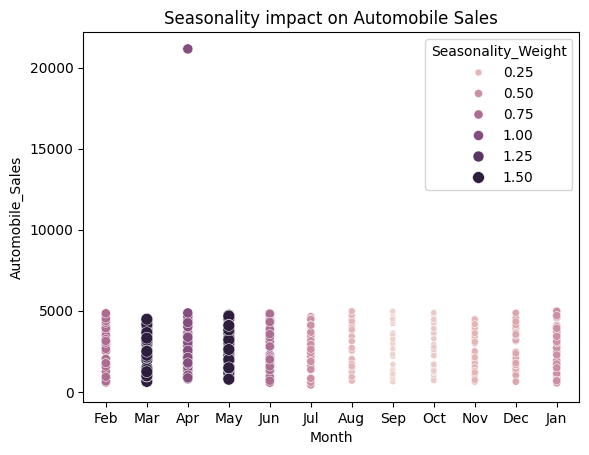

In [17]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] 
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight')

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

### Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


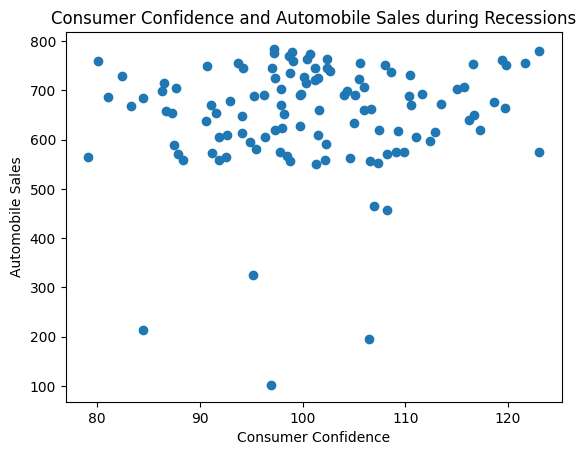

In [18]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

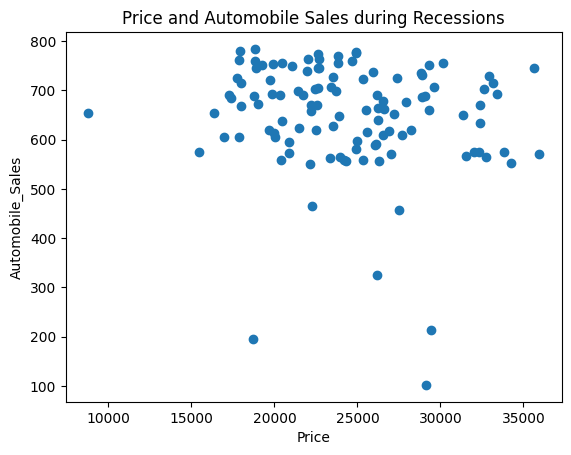

In [20]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Price and Automobile Sales during Recessions')
plt.show()

### Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.


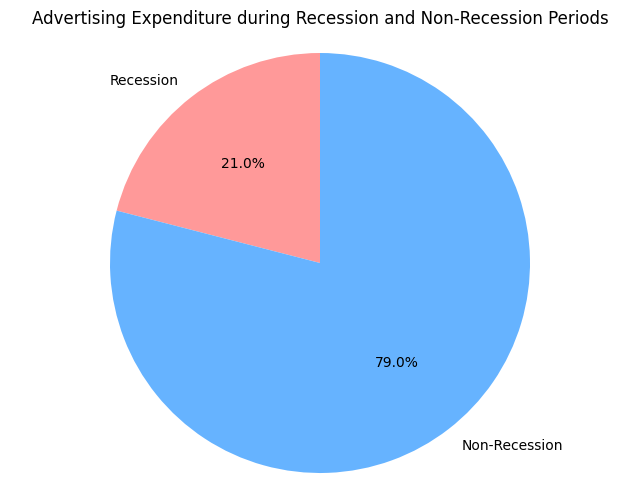

In [27]:
Rtotal = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
NRtotal = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [Rtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=['#ff9999','#66b3ff'])

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.axis('equal')
plt.show()

### Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>


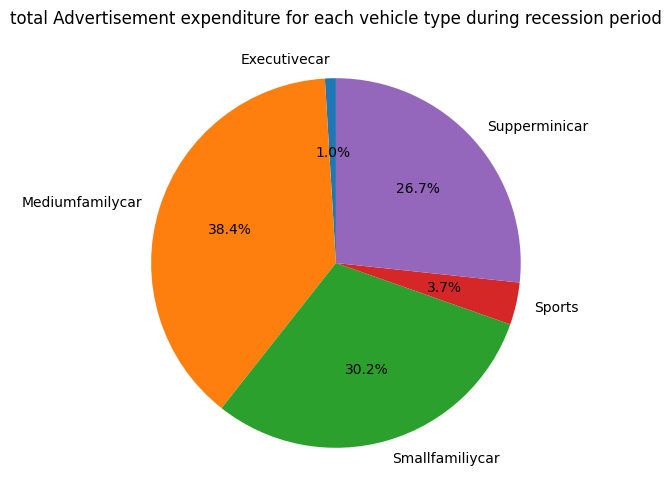

In [29]:
Rdata = df[df['Recession'] == 1]
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('total Advertisement expenditure for each vehicle type during recession period')

plt.show()

### Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
#### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


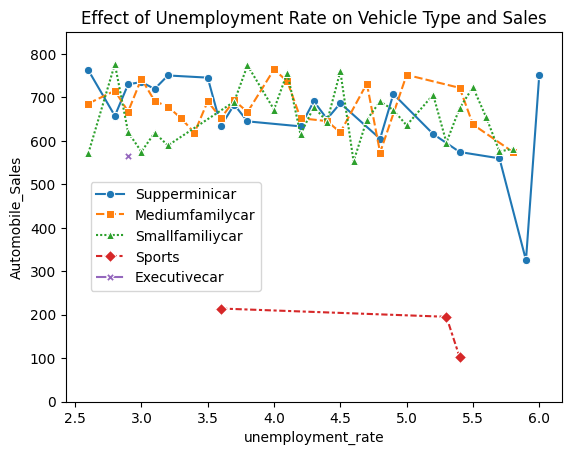

In [45]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers=['o', 's', '^', 'D', 'X'], err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.show()

### Create a map on the hightest sales region/offices of the company during recession period
#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


In [50]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = 'us-states.json'

response = requests.get(url)
if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"File '{filename}' downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File 'us-states.json' downloaded successfully.


In [53]:
recession_data = df[df['Recession'] == 1]
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

map1